In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [142]:
df = pd.read_csv('/Users/dooinnkim/ironhack_da_may_2023/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [143]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [145]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [146]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [147]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


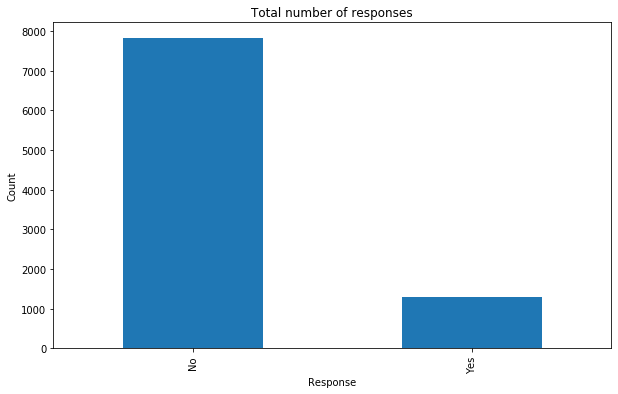

In [148]:
response_counts = df['response'].value_counts()

plt.figure(figsize=(10,6))
response_counts.plot(kind='bar')
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total number of responses')
plt.show()

In [149]:
response_rate = df[df['response'] == 'Yes'].groupby('sales_channel').size() / df.groupby('sales_channel').size()

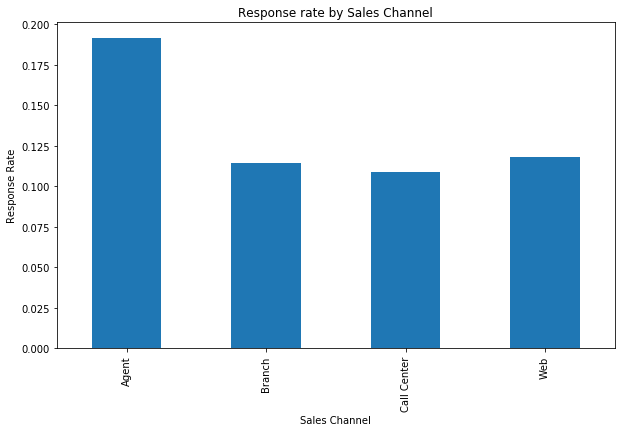

In [154]:
plt.figure(figsize=(10,6))
response_rate.plot(kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.title('Response rate by Sales Channel')
plt.show()

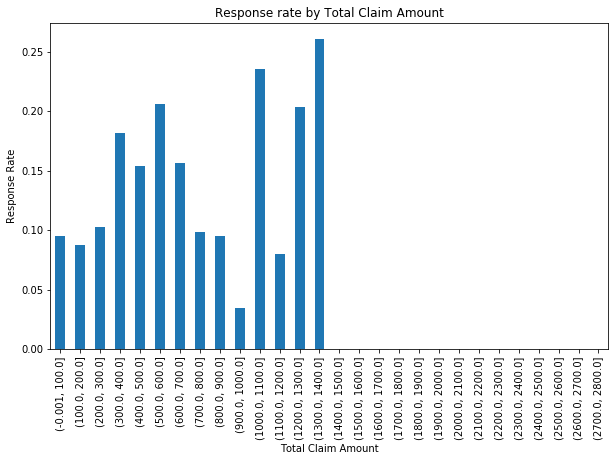

In [156]:
# Calculate the minimum and maximum values of total_claim_amount
min_value = int(df['total_claim_amount'].min())
max_value = int(df['total_claim_amount'].max())

# Create bins as a range from min_value to max_value with a step of your choosing
bins = range(min_value, max_value + 1, 100)  # change the step size to better fit your data

# Let's create bins for total claim amount and assign it to a new column
df['bins'] = pd.cut(df['total_claim_amount'], bins=bins, include_lowest=True)

# Now let's calculate the total and 'Yes' responses within each bin
response_total = df.groupby('bins')['response'].count()
response_yes = df[df['response'] == 'Yes'].groupby('bins')['response'].count()

# Now we can correctly calculate the response rate
response_rate = response_yes / response_total

# Plot
plt.figure(figsize=(10,6))
response_rate.plot(kind='bar')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response rate by Total Claim Amount')
plt.show()

In [131]:
df['total_claim_amount_round']=round(df['total_claim_amount'],0)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
customer                         9134 non-null object
state                            9134 non-null object
customer_lifetime_value          9134 non-null float64
response                         9134 non-null object
coverage                         9134 non-null object
education                        9134 non-null object
effective_to_date                9134 non-null object
employmentstatus                 9134 non-null object
gender                           9134 non-null object
income                           9134 non-null int64
location_code                    9134 non-null object
marital_status                   9134 non-null object
monthly_premium_auto             9134 non-null int64
months_since_last_claim          9134 non-null int64
months_since_policy_inception    9134 non-null int64
number_of_open_complaints        9134 non-null int64
number_of_policies               

In [137]:
df['total_claim_amount_bins'] = pd.cut(df['total_claim_amount_round'], bins=10)

In [140]:
df['total_claim_amount_bins']

0        (289.3, 578.6]
1       (867.9, 1157.2]
2        (289.3, 578.6]
3        (289.3, 578.6]
4       (-2.893, 289.3]
             ...       
9129    (-2.893, 289.3]
9130     (289.3, 578.6]
9131     (578.6, 867.9]
9132     (578.6, 867.9]
9133     (289.3, 578.6]
Name: total_claim_amount_bins, Length: 9134, dtype: category
Categories (10, interval[float64]): [(-2.893, 289.3] < (289.3, 578.6] < (578.6, 867.9] < (867.9, 1157.2] ... (1735.8, 2025.1] < (2025.1, 2314.4] < (2314.4, 2603.7] < (2603.7, 2893.0]]

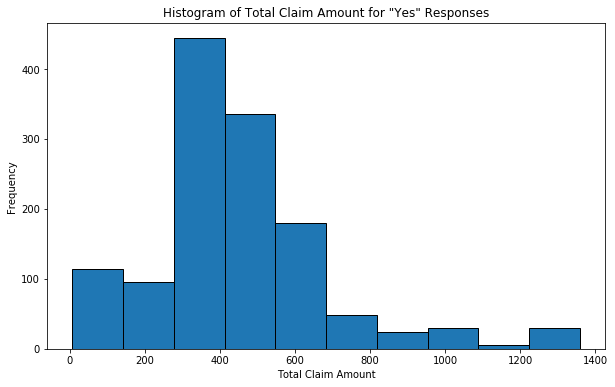

In [133]:
# Create a subset of your DataFrame where 'response' is 'Yes'
subset = df[df['response'] == 'Yes']

plt.figure(figsize=(10,6))
plt.hist(subset['total_claim_amount'], bins=10, edgecolor='black')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Total Claim Amount for "Yes" Responses')
plt.show()